# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [1]:
import pandas as pd
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

In [15]:
#I will start by removing names and ids.
# cdf is a CleansedDataFrame
cdf = df.drop(columns=['WaterworksName'])
cdf 

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,15.217089,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,28.970630,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,NaN,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,60.686602,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,19.339643,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,25.079249,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


# Time to investigate the missing values.

<Axes: >

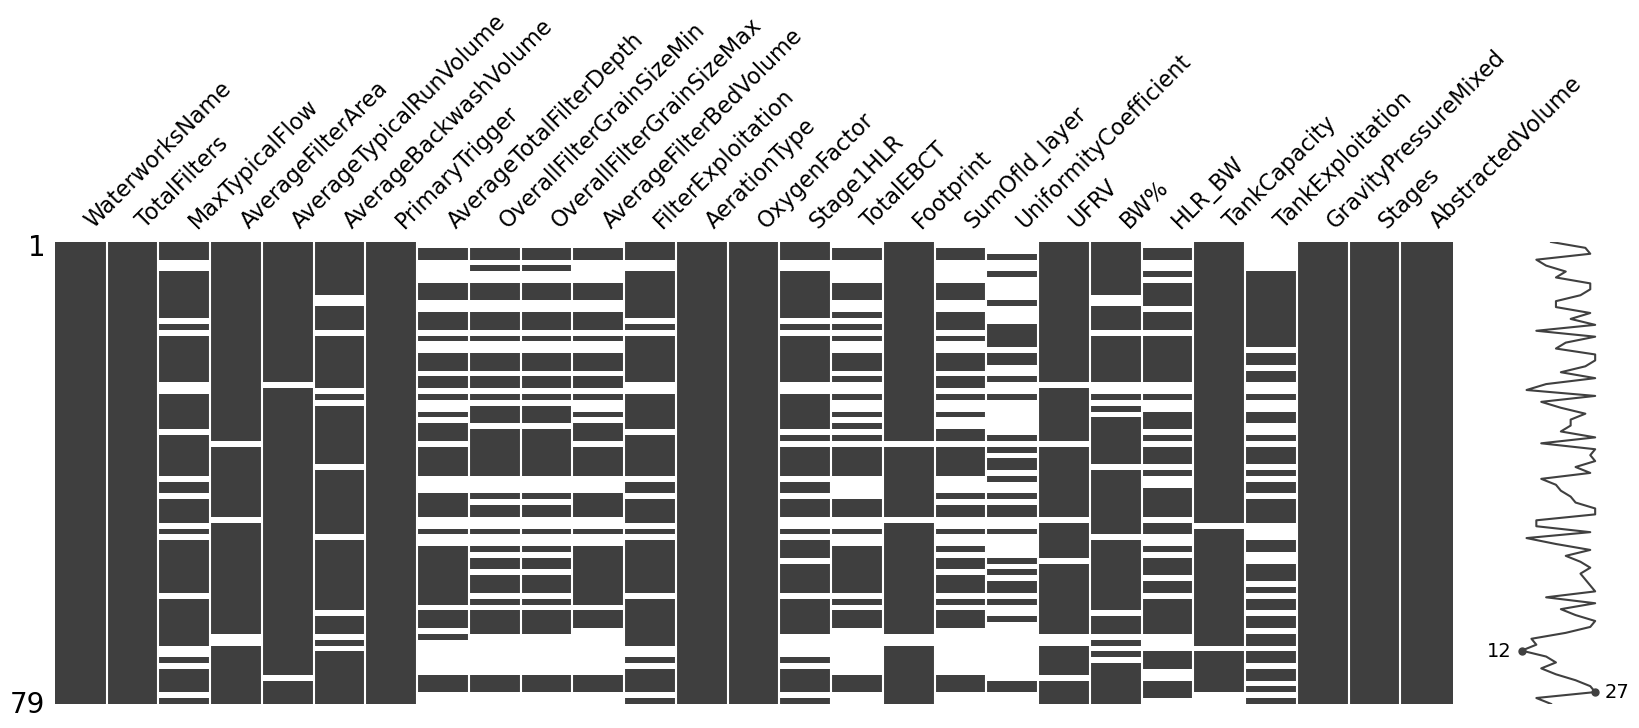

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

mno.matrix(df, figsize = (20, 6))

As you can see on the missing values plot for each column, there quite a few NaN values.
Let's figure out which columns have NaN values and what is the percentage.

In [17]:

columnsAbove15PercentageNaN = []
columnsBelow15PercentageNaN = []
for column in cdf.columns:
    nan_sum = cdf[column].isna().sum()
    nan_percentage = (nan_sum / len(cdf)) * 100
    if nan_percentage>0: # Printing only the column which have some NaN values
        if nan_percentage>=15:
            columnsAbove15PercentageNaN.append(column)
        elif nan_percentage<15 and nan_percentage>0:
            columnsBelow15PercentageNaN.append(column)
        print(f"Column '{column}': {nan_percentage:.2f}% NaN values")

print('-----------------------')
print(f'We are going to drop columns above 15 percent as this a very small data set\n so we can make the threshold relatively high to keep data in place.')
print(f'{columnsAbove15PercentageNaN}')

cdf = cdf.drop(columns=columnsAbove15PercentageNaN)
cdf

Column 'MaxTypicalFlow': 20.25% NaN values
Column 'AverageFilterArea': 5.06% NaN values
Column 'AverageTypicalRunVolume': 2.53% NaN values
Column 'AverageBackwashVolume': 12.66% NaN values
Column 'AverageTotalFilterDepth': 41.77% NaN values
Column 'OverallFilterGrainSizeMin': 43.04% NaN values
Column 'OverallFilterGrainSizeMax': 43.04% NaN values
Column 'AverageFilterBedVolume': 43.04% NaN values
Column 'FilterExploitation': 20.25% NaN values
Column 'Stage1HLR': 26.58% NaN values
Column 'TotalEBCT': 49.37% NaN values
Column 'Footprint': 5.06% NaN values
Column 'SumOfld_layer': 49.37% NaN values
Column 'UniformityCoefficient': 64.56% NaN values
Column 'UFRV': 8.86% NaN values
Column 'BW%': 16.46% NaN values
Column 'HLR_BW': 34.18% NaN values
Column 'TankCapacity': 5.06% NaN values
Column 'TankExploitation': 37.97% NaN values
-----------------------
We are going to drop columns above 15 percent as this a very small data set
 so we can make the threshold relatively high to keep data in pl

,TotalFilters,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AerationType,OxygenFactor,Footprint,UFRV,TankCapacity,GravityPressureMixed,Stages,AbstractedVolume
0,6,6.000000,5200.00000,10.00,Time,Cascade,1.880000,143.341204,866.666667,27.294778,Gravity,Single,253543
1,4,4.908739,300.00000,28.00,Volume,Air injection,1.620000,16.714412,40.743665,2.576075,Pressure,Double,612094
2,4,15.343900,3800.00000,83.30,Volume,Bottom aeration,2.213333,44.693822,249.217919,21.825600,Gravity,Double,682318
3,2,16.000000,1200.00000,26.00,Volume,Cascade,2.073333,194.588021,75.000000,12.554300,Gravity,Single,156998
4,2,1.495000,250.00000,4.50,Volume,Cascade,1.313333,412.300024,167.224093,52.220566,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,47.940002,NaN,110.00,Mix,Cascade,1.546667,24.106636,NaN,9.176959,Gravity,Double,11454775
75,20,10.178760,4500.00000,57.00,Volume,Passive plate aerator,2.133333,22.050800,442.097088,6.040393,Pressure,Single,11021800
76,6,14.752500,2331.50137,51.57,Time,Bottom aeration,1.673333,209.076387,158.041107,22.367525,Gravity,Single,423362
77,12,37.437401,4400.00000,134.00,Volume,Cascade,2.200000,152.513970,93.489396,NaN,Gravity,Double,1521895


In [18]:
#Now let's take a look at imputing the missing NaN values in the following columns.
print(f'{columnsBelow15PercentageNaN}')
#Let's see how many NaN are there per row 
rowsWithNaN= cdf[cdf.isnull().sum(axis=1)>=4]#Play with this value
#So the maximum is 4 missing values in one row so we decide to not drop any rows.
print(rowsWithNaN)



['AverageFilterArea', 'AverageTypicalRunVolume', 'AverageBackwashVolume', 'Footprint', 'UFRV', 'TankCapacity']
    TotalFilters  AverageFilterArea  AverageTypicalRunVolume  \
67             2                NaN                   2500.0   

    AverageBackwashVolume PrimaryTrigger           AerationType  OxygenFactor  \
67                    NaN         Volume  Pure oxygen injection      1.646667   

    Footprint  UFRV  TankCapacity GravityPressureMixed  Stages  \
67        NaN   NaN      6.918841             Pressure  Single   

    AbstractedVolume  
67            633054  


## Now let's try imputing the missing values.
I will try to use three different methods for the sake of demonstration purposes. I also assume that the data is Missing at Random (MAR) or Missing Completely at Random (MCAR) as I believe that this data was not provided by a mistake or other random reason. Therefore, I choose to impute the data.

The first one will be done using mean which is a very simple and fast method and it works well with numeric data. Drawbacks are it doesn't factor the correlations between data and it is not very accurate.

The second is going to be done using KNNImputer from sklearn which way more accurate than mean, but it is also computationally expensive. However, this is not a problem for this small dataset.

The third one will be done using Regression Model to predict the missing data based on the present data. It has the same benefits as the second one and it is also computationally expensive. I will use IterativeImputer from sklearn to achieve that.

Below are the columns that we choose to impute: 
['AverageFilterArea', 'AverageTypicalRunVolume', 'AverageBackwashVolume', 'Footprint', 'UFRV', 'TankCapacity']
Below is a plot showing that there are no more missing values in the dataset.


<Axes: >

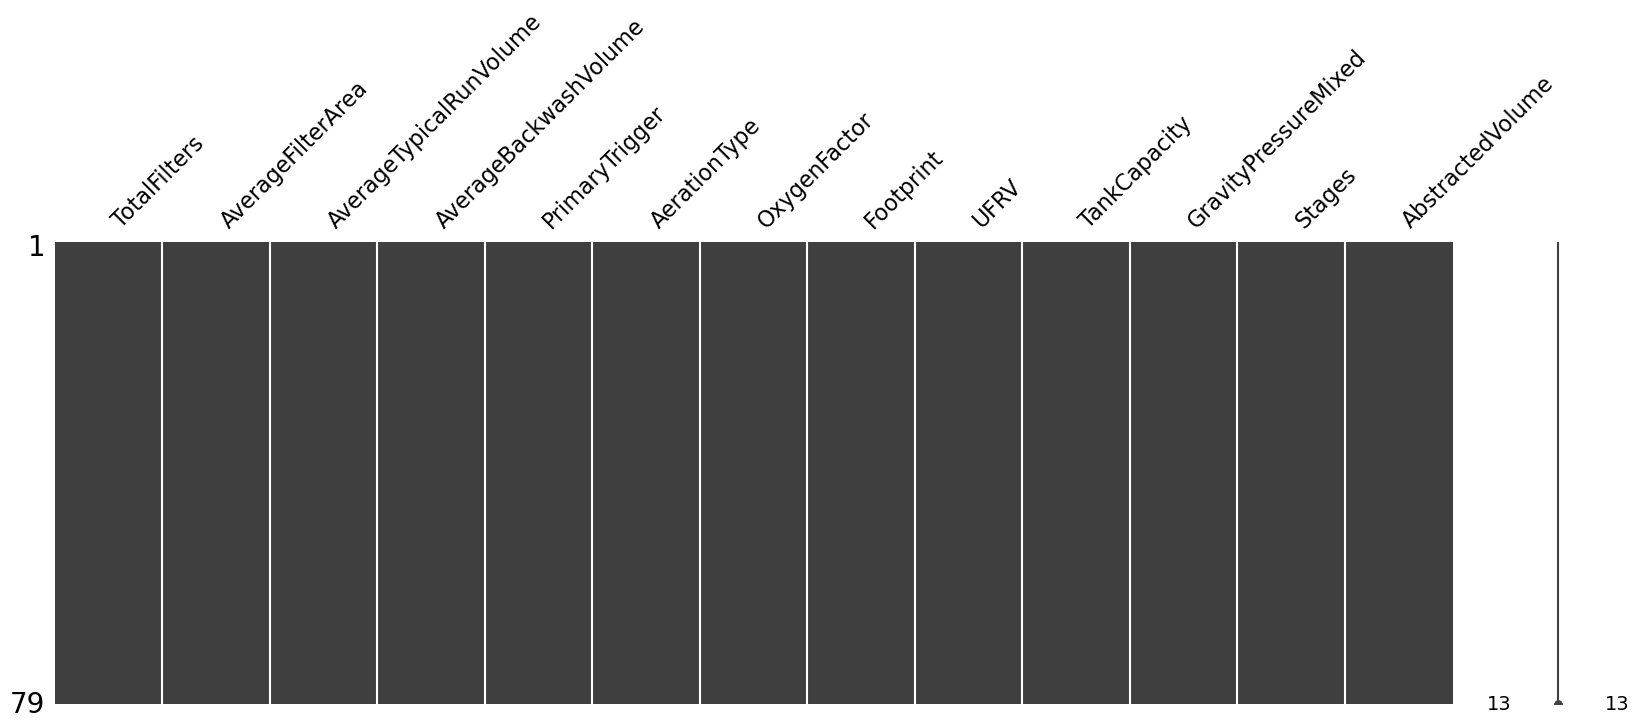

In [19]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

print(f'Below are the columns that we choose to impute: \n{columnsBelow15PercentageNaN}')
#Imputing using mean
cdf['AverageFilterArea'].fillna(cdf['AverageFilterArea'].mean(), inplace=True)
cdf['AverageTypicalRunVolume'].fillna(cdf['AverageTypicalRunVolume'].mean(), inplace=True)

#Imputing using KNNImputer 
columns_to_impute = ['AverageBackwashVolume', 'Footprint']
cdf[columns_to_impute] = KNNImputer().fit_transform(cdf[columns_to_impute])

#Imputing using regression
columns_regression = ['UFRV', 'TankCapacity']
cdf[columns_regression] = IterativeImputer().fit_transform(cdf[columns_regression])
cdf

print("Below is a plot showing that there are no more missing values in the dataset.")
mno.matrix(cdf, figsize = (20, 6))


## Let's scale the numeric data now.

I wanted to scale a part of the data using Min-Max scaling and another part using standardization, however I found out that there are potential issues with that approach. This could make the interpretation of the features more difficult as they would be on different scales. Another problem could be that some algorithms may be affected by the fact that the data is scaled differently. Therefore, I will use only standardization method which main advantages are that it preserves the shape of data distribution as well as it is robust to outliers.

In [20]:
from sklearn.preprocessing import StandardScaler

numeric_columns = cdf.select_dtypes(include=['float64', 'int64']).columns
scaled_data = StandardScaler().fit_transform(cdf[numeric_columns])
#Below is scaled data frame
sdf = pd.DataFrame(scaled_data, columns=numeric_columns)
#Now we also need to concatenate non-numeric columns with the scaled data frame
sdf = pd.concat([cdf[cdf.columns.difference(numeric_columns)], sdf], axis=1)
sdf

,AerationType,GravityPressureMixed,PrimaryTrigger,Stages,TotalFilters,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,OxygenFactor,Footprint,UFRV,TankCapacity,AbstractedVolume
0,Cascade,Gravity,Time,Single,-0.062970,-0.676024,0.013237,-0.889573,-0.095208,0.923767,2.850454,0.658614,-0.458419
1,Air injection,Pressure,Volume,Double,-0.560431,-0.805423,-0.547112,-0.355197,-1.127717,-0.819477,-1.391718,-1.127504,-0.263853
2,Bottom aeration,Gravity,Volume,Double,-0.560431,0.431950,-0.146863,1.286525,1.228522,-0.434291,-0.320935,0.263423,-0.225746
3,Cascade,Gravity,Volume,Single,-1.057891,0.509748,-0.444191,-0.414572,0.672555,1.629271,-1.215768,-0.406500,-0.510808
4,Cascade,Gravity,Volume,Single,-1.057891,-1.210214,-0.552830,-1.052854,-2.345548,4.626466,-0.742079,2.459696,-0.592361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Cascade,Gravity,Mix,Double,2.424334,4.297105,0.000000,2.079183,-1.418938,-0.717710,-0.096894,-0.650539,5.619877
75,Passive plate aerator,Pressure,Volume,Single,3.419256,-0.180518,-0.066813,0.505742,0.910826,-0.746012,0.669746,-0.877181,5.384925
76,Bottom aeration,Gravity,Time,Single,-0.062970,0.361823,-0.314796,0.344539,-0.915920,1.828729,-0.789245,0.302582,-0.366267
77,Cascade,Gravity,Volume,Double,1.429413,3.051735,-0.078249,2.791684,1.175572,1.050046,-1.120801,-0.171603,0.229847


## Time to change the categorical data.

I am going to use One-Hot encoding to convert AerationType, GravityPressureMixed and PrimaryTrigger. For Stages I will use label encoding as I believe that this column represents ordinal data (i.e., categories with a meaningful order or ranking). If there are Double stages then there probably also was a single stage before meaning that there is some kind of order.

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['AerationType','GravityPressureMixed','PrimaryTrigger']
categorical_data = sdf[categorical_columns]
encoder = OneHotEncoder(dtype=int)
encoded_data = encoder.fit_transform(categorical_data)

label_encoder = LabelEncoder()
#Encoded data frame
edf = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns))
#Now concatenate
edf = pd.concat([edf, sdf.drop(columns=categorical_columns)], axis=1)
edf['Stages'] =label_encoder.fit_transform(edf['Stages']) 
edf

,AerationType_Air injection,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,GravityPressureMixed_Gravity,GravityPressureMixed_Mixed,...,Stages,TotalFilters,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,OxygenFactor,Footprint,UFRV,TankCapacity,AbstractedVolume
0,0,0,1,0,0,0,0,0,1,0,...,2,-0.062970,-0.676024,0.013237,-0.889573,-0.095208,0.923767,2.850454,0.658614,-0.458419
1,1,0,0,0,0,0,0,0,0,0,...,0,-0.560431,-0.805423,-0.547112,-0.355197,-1.127717,-0.819477,-1.391718,-1.127504,-0.263853
2,0,1,0,0,0,0,0,0,1,0,...,0,-0.560431,0.431950,-0.146863,1.286525,1.228522,-0.434291,-0.320935,0.263423,-0.225746
3,0,0,1,0,0,0,0,0,1,0,...,2,-1.057891,0.509748,-0.444191,-0.414572,0.672555,1.629271,-1.215768,-0.406500,-0.510808
4,0,0,1,0,0,0,0,0,1,0,...,2,-1.057891,-1.210214,-0.552830,-1.052854,-2.345548,4.626466,-0.742079,2.459696,-0.592361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,1,0,0,0,0,0,1,0,...,0,2.424334,4.297105,0.000000,2.079183,-1.418938,-0.717710,-0.096894,-0.650539,5.619877
75,0,0,0,0,0,0,1,0,0,0,...,2,3.419256,-0.180518,-0.066813,0.505742,0.910826,-0.746012,0.669746,-0.877181,5.384925
76,0,1,0,0,0,0,0,0,1,0,...,2,-0.062970,0.361823,-0.314796,0.344539,-0.915920,1.828729,-0.789245,0.302582,-0.366267
77,0,0,1,0,0,0,0,0,1,0,...,0,1.429413,3.051735,-0.078249,2.791684,1.175572,1.050046,-1.120801,-0.171603,0.229847


## We will now look for outliers in the dataset.

In [22]:
def checkForOutliersInCertainColumn(column):
    outlier_threshold = 1.5

    # Create an empty DataFrame to store outliers
    outliers_df = pd.DataFrame()

    Q1 = edf[column].quantile(0.25)
    Q3 = edf[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR

    outliers = edf[(edf[column] < lower_bound) | (edf[column] > upper_bound)]

    outliers_df = pd.concat([outliers_df, outliers])

    # Display the DataFrame containing outliers
    print("Outliers in " + column + ":")
    print(outliers_df[column])       

checkForOutliersInCertainColumn('TotalFilters')
checkForOutliersInCertainColumn('AverageFilterArea')
checkForOutliersInCertainColumn('AverageTypicalRunVolume')
checkForOutliersInCertainColumn('AverageBackwashVolume')
checkForOutliersInCertainColumn('OxygenFactor')
checkForOutliersInCertainColumn('Footprint')
checkForOutliersInCertainColumn('UFRV')
checkForOutliersInCertainColumn('TankCapacity')
checkForOutliersInCertainColumn('AbstractedVolume')

Outliers in TotalFilters:
19    2.424334
36    2.921795
74    2.424334
75    3.419256
Name: TotalFilters, dtype: float64
Outliers in AverageFilterArea:
48    2.402240
74    4.297105
77    3.051735
Name: AverageFilterArea, dtype: float64
Outliers in AverageTypicalRunVolume:
8     1.934432
17    0.619328
29    4.678996
43    0.730369
52    6.623062
55    0.659353
64    0.676506
Name: AverageTypicalRunVolume, dtype: float64
Outliers in AverageBackwashVolume:
14    2.655121
28    2.277100
29    3.847077
74    2.079183
77    2.791684
Name: AverageBackwashVolume, dtype: float64
Outliers in OxygenFactor:
4    -2.345548
26   -2.284657
46   -3.081542
64   -2.372023
Name: OxygenFactor, dtype: float64
Outliers in Footprint:
3     1.629271
4     4.626466
50    5.126396
53    1.529033
76    1.828729
Name: Footprint, dtype: float64
Outliers in UFRV:
0     2.850454
8     2.964594
25    4.203493
Name: UFRV, dtype: float64
Outliers in TankCapacity:
4     2.459696
27    2.442900
73    5.654408
Name: Tan

Inspecting the output, let's see what types of outliers we have:

- First, we see that fx Water Plant #74 is an outlier in many columns - it has a massive amount of very large filters, as well as taking massive amounts of water into the plant in the first place.
- Water plants #4 and #50 have a very large Water Footprint.
- Water plant #52 processes a massive amount of water compared to other plants - it has a very high AverageTypicalRunVolume.
- Water plant #73 has a very large tank capacity.

However, we will keep these outliers because they do not seem out of the ordinary.

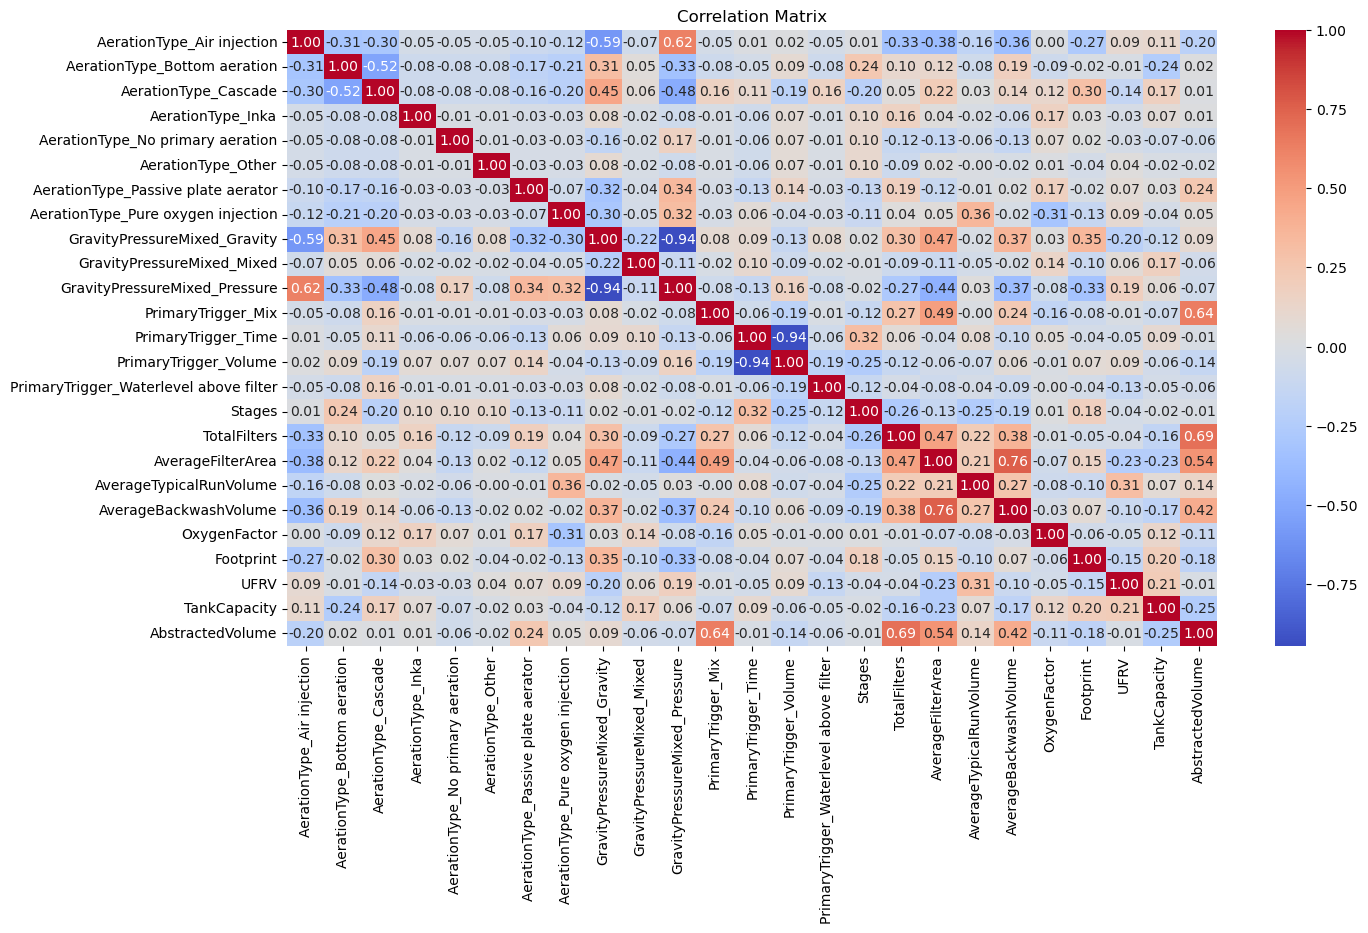

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
correlation_matrix = edf.corr()

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Looking at the correlation Matrix...

By a closer investigation of the matrix we can find the features that are highly correlated and try to remove them in order to eliminate redundant information to simplify the model. This also prevents the model from overfitting and positively affects its ability to generalize.

It seems that the Filter Size (Avg Filter Area) is positively correlated to the Backwash volume! It could be that a bigger filter means that more water is needed to wash it. The Avg Filter Area column also seems to be moderately related to other columns such as 'Primary Trigger - Mix' and Abstracted Volume, so I would remove the Filter Size and leave the Backwash volume - from that column, we can then kind of assume the size of the water plant's filters, since they had a high positive correlation.

It seems that there is also a high correlation between the Abstracted Volume of water and the Number of filters. It could be that the more water the water plant draws, the more filters it needs. The Abstracted Volume column also slightly relates to other columns such as "Primary Trigger - Mix" (which makes sense, because if it's triggered by a Mix of triggers, it makes sense that it draws a lot of volume of water?), so this is the column I would remove - Abstracted Volume. We can then assume, with moderate accuracy, the Abstracted Volume from the Number of Filters (TotalFilters column.)

In [13]:
drop_cols = ["AverageFilterArea", "AbstractedVolume"]

edf = edf.drop(columns=drop_cols)

### What about log/sqrt at this stage?

Let's try to look at the distribution plot and try to log some right skewed columns. This will attempt to make the data normally distributed which could be beneficial for some of the models. I will also try to square root the left skewed data.

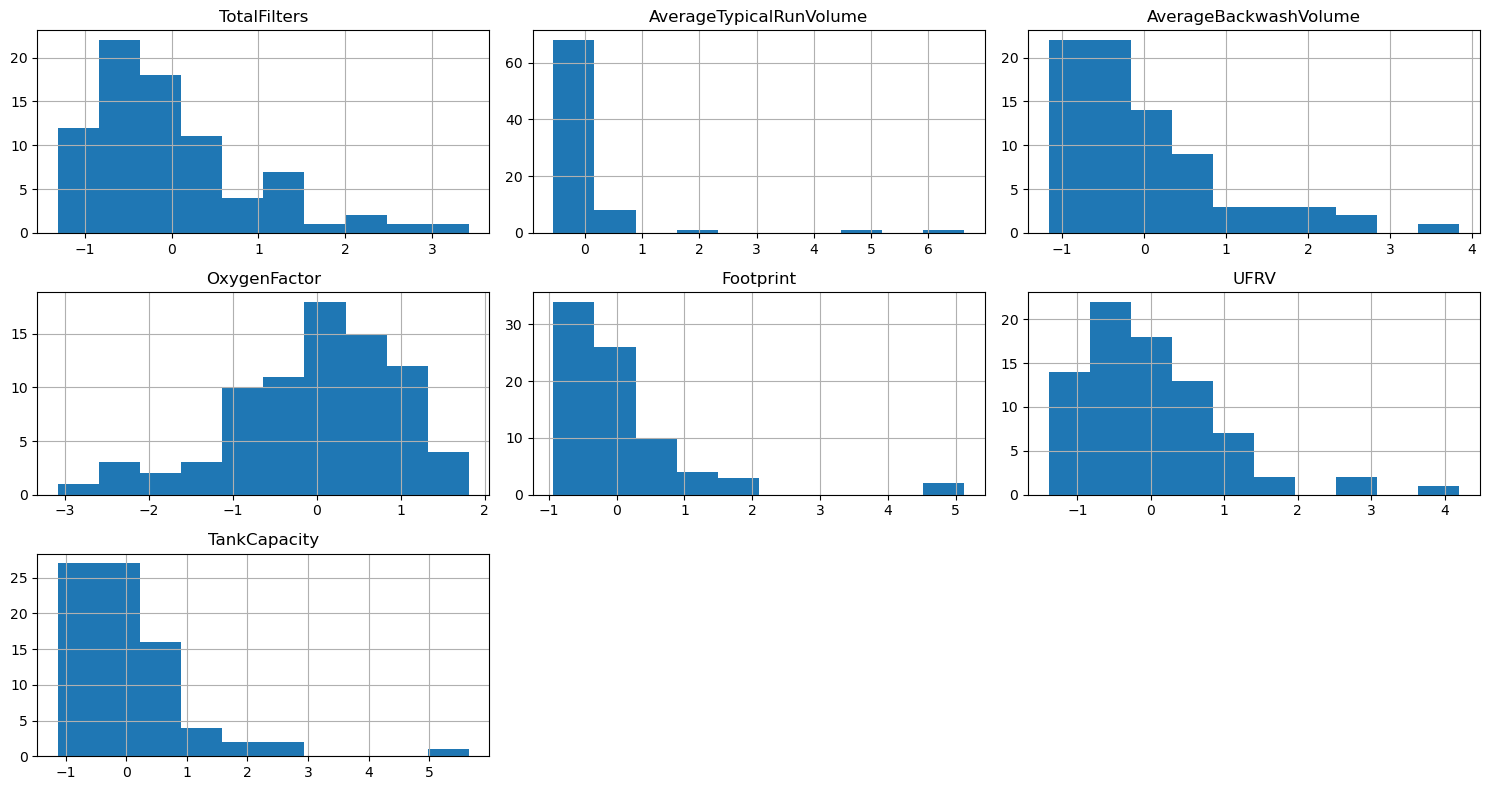

In [14]:
float_columns = edf.select_dtypes(include=['float64']).columns
edf[float_columns].hist(figsize=(15, 8))
plt.tight_layout()
plt.show()

As you can see the all of the data is more or less skewed. I will attempt to log UFRV and take a square root of the OxygenFactor.

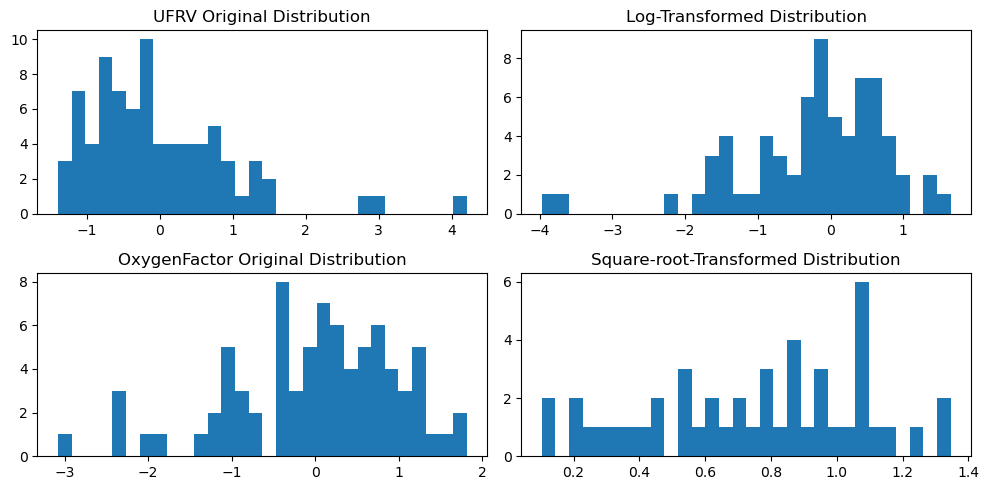

In [28]:
import numpy as np
#Transformed data frame
tdf = edf

tdf['log_UFRV'] = np.log1p(tdf['UFRV'])
tdf['sqrt_OxygenFactor'] = np.sqrt(tdf['OxygenFactor'])

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.hist(tdf['UFRV'], bins=30)
plt.title('UFRV Original Distribution')

plt.subplot(2, 2, 2)
plt.hist(tdf['log_UFRV'], bins=30)
plt.title('Log-Transformed Distribution')

plt.subplot(2, 2, 3)
plt.hist(tdf['OxygenFactor'], bins=30)
plt.title('OxygenFactor Original Distribution')

plt.subplot(2, 2, 4)
plt.hist(tdf['sqrt_OxygenFactor'], bins=30)
plt.title('Square-root-Transformed Distribution')
plt.tight_layout()
plt.show()


Well, it turns out that the log-transformed UFRV is now left skewed so maybe it was not the best idea. A reason for that could be that I performed the transformation after scaling. Possibly a better idea would be to do it before scaling. However, taking a square root of OxygenFactor seemed to work well to distribute the data more. This shows that while data transformation is relatively simple to do, it is also very powerful and should be used with caution and consideration.

### Let's reflect on the small size of the dataset and what this might mean in a Machine Learning context.

Yes, we only have about 80 rows. This introduces a couple of challenges when building a model.

- With so little data points, it might be hard for the model to find patterns to later generalize on new data.
- With so little data, it's hard to split the dataset into training/testing subsets. On top of that, the performance of the model may highly vary depending on what "chunk" of the data was chosen for each subset.
- With so little data, there is a high risk of overfitting because the model is highly sensitive to noise and has very little to learn from.

Possible solutions:

- It was earlier mentioned that we are working only with a subset of the data. More data usually generally means better predictions, so one approach would be to contact the owners of the project and ask for the entire dataset, or at least a larger chunk. They may say no, but it doesn't hurt to ask!
- If we, however, do not manage to acquire more data:
    - When training, we should opt for simple models that are not prone to overfitting to keep the predictions as general as possible.
    - We should implement thorough cross-validation to see what are the best combinations of subsets to train our data on for better generalizations.
- Earlier, we dropped a lot of columns that had a large percentage of missing values. Another approach to the small dataset would be to train a model JUST on the rows that have all columns filled out, to see if, although this subset has even less rows (maybe around 40, 50), our model could find a pattern amidst the data that we dropped.

And, from what we know... the data is clean. :)